# Combined Oracle Bandits

Analyze the performance of various oracle bandits that solve the combined activity and matching task

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import random 
import matplotlib.pyplot as plt
import json 
import argparse 
import sys

In [3]:
from rmab.simulator import RMABSimulator, random_valid_transition, random_valid_transition_round_down, synthetic_transition_small_window
from rmab.uc_whittle import UCWhittleBuggy, UCWhittle
from rmab.ucw_value import UCWhittle_value
from rmab.baselines import optimal_whittle, random_policy, WIQL, optimal_q_iteration, optimal_sufficient_q, optimal_neural_q_iteration, optimal_whittle_sufficient
from rmab.fr_dynamics import get_all_transitions
from rmab.utils import get_save_path, delete_duplicate_results


In [4]:
is_jupyter = 'ipykernel' in sys.modules

In [62]:
if is_jupyter: 
    seed        = 42
    n_arms      = 4
    budget      = 3 
    discount    = 0.9
    alpha       = 3 
    n_episodes  = 30
    episode_len = 20 
    n_epochs    = 10
    save_name = 'combined_lamb'
    match_prob = 0.5
    save_with_date = False 
else:
    parser = argparse.ArgumentParser()
    parser.add_argument('--n_arms',         '-N', help='num beneficiaries (arms)', type=int, default=8)
    parser.add_argument('--episode_len',    '-H', help='episode length', type=int, default=20)
    parser.add_argument('--n_episodes',     '-T', help='num episodes', type=int, default=30)
    parser.add_argument('--budget',         '-B', help='budget', type=int, default=3)
    parser.add_argument('--n_epochs',       '-E', help='number of epochs (num_repeats)', type=int, default=10)
    parser.add_argument('--discount',       '-d', help='discount factor', type=float, default=0.9)
    parser.add_argument('--alpha',          '-a', help='alpha: for conf radius', type=float, default=3)
    parser.add_argument('--seed',           '-s', help='random seed', type=int, default=42)
    parser.add_argument('--save_name',      '-n', help='save name', type=str, default='combined_lamb')
    parser.add_argument('--match_prob',      '-m', help='match probability', type=float, default=0.5)
    parser.add_argument('--use_date', action='store_true')

    args = parser.parse_args()

    n_arms      = args.n_arms
    budget      = args.budget
    discount    = args.discount
    alpha       = args.alpha 
    seed        = args.seed
    n_episodes  = args.n_episodes
    episode_len = args.episode_len
    n_epochs    = args.n_epochs
    save_name   = args.save_name 
    save_with_date = args.use_date 
    match_prob = args.match_prob 



In [63]:
n_states = 2
n_actions = 2

In [64]:
all_population_size = 100 # number of random arms to generate
all_transitions = get_all_transitions(all_population_size)

In [65]:
all_transitions.shape

(100, 2, 2, 2)

In [66]:
all_features = np.arange(all_population_size)

In [67]:
np.random.seed(seed)
random.seed(seed)
simulator = RMABSimulator(all_population_size, all_features, all_transitions,
            n_arms, episode_len, n_epochs, n_episodes, budget, number_states=n_states, reward_style='match',match_probability=match_prob)

acting should always be good! 0.000 < 0.044
acting should always be good! 0.000 < 0.162
acting should always be good! 0.108 < 0.183
good start state should always be good! 0.380 < 0.508
good start state should always be good! 0.506 < 0.760
cohort [83 53 70 45 44]
cohort [69 40 44 33 42]
cohort [ 3 79 75 42 72]
cohort [24 53  6 31 26]
cohort [14 94 69 81 63]
cohort [42 54 50 84 96]
cohort [26 74 15 37 45]
cohort [22 28 47 63 11]
cohort [90 17 15  2 69]
cohort [89  1 92 57 47]


In [68]:
rewards_by_lamb = {}
std_by_lamb = {}
active_rates_by_lamb = {}

In [69]:
lamb = 1

In [13]:
np.random.seed(seed)
random.seed(seed)
optimal_reward = optimal_q_iteration(simulator, n_episodes, n_epochs, discount,reward_function='activity')
optimal_active_rate = simulator.total_active/(optimal_reward.size*n_arms)
optimal_active_rate

first state [0 1 1 1]
instance 0, ep 1, state [1 1 1 1]
instance 0, ep 2, state [0 0 0 1]
instance 0, ep 3, state [1 1 0 1]
instance 0, ep 4, state [0 1 1 1]
instance 0, ep 5, state [0 0 0 1]
instance 0, ep 6, state [0 0 0 1]
instance 0, ep 7, state [0 1 1 0]
instance 0, ep 8, state [1 1 0 1]
instance 0, ep 9, state [1 1 1 1]
instance 0, ep 10, state [0 0 0 0]
instance 0, ep 11, state [0 1 0 0]
instance 0, ep 12, state [0 1 0 1]
instance 0, ep 13, state [0 0 0 0]
instance 0, ep 14, state [1 0 1 0]
instance 0, ep 15, state [0 0 0 1]
instance 0, ep 16, state [0 0 0 0]
instance 0, ep 17, state [1 1 0 1]
instance 0, ep 18, state [0 1 0 0]
instance 0, ep 19, state [0 1 1 1]
instance 0, ep 20, state [0 1 1 0]
instance 0, ep 21, state [0 0 1 0]
instance 0, ep 22, state [1 0 1 1]
instance 0, ep 23, state [0 1 1 1]
instance 0, ep 24, state [0 0 1 1]
instance 0, ep 25, state [0 0 1 0]
instance 0, ep 26, state [1 1 1 1]
instance 0, ep 27, state [0 1 1 0]
instance 0, ep 28, state [0 1 1 0]
instanc

0.5975416666666666

In [14]:
np.random.seed(seed)
random.seed(seed)
optimal_match_reward = optimal_q_iteration(simulator, n_episodes, n_epochs, discount)
optimal_match_active_rate = simulator.total_active/(optimal_match_reward.size*n_arms)
np.mean(optimal_match_reward)

first state [0 1 1 1]
instance 0, ep 1, state [1 1 1 1]
instance 0, ep 2, state [0 0 0 1]
instance 0, ep 3, state [1 1 0 1]
instance 0, ep 4, state [0 1 1 1]
instance 0, ep 5, state [0 0 0 1]
instance 0, ep 6, state [0 0 0 1]
instance 0, ep 7, state [0 1 1 0]
instance 0, ep 8, state [1 1 0 1]
instance 0, ep 9, state [1 1 1 1]
instance 0, ep 10, state [0 0 0 0]
instance 0, ep 11, state [0 1 0 0]
instance 0, ep 12, state [0 1 0 1]
instance 0, ep 13, state [0 0 0 0]
instance 0, ep 14, state [1 0 1 0]
instance 0, ep 15, state [0 0 0 1]
instance 0, ep 16, state [0 0 0 0]
instance 0, ep 17, state [1 1 0 1]
instance 0, ep 18, state [0 1 0 0]
instance 0, ep 19, state [0 1 1 1]
instance 0, ep 20, state [0 1 1 0]
instance 0, ep 21, state [0 0 1 0]
instance 0, ep 22, state [1 0 1 1]
instance 0, ep 23, state [0 1 1 1]
instance 0, ep 24, state [0 0 1 1]
instance 0, ep 25, state [0 0 1 0]
instance 0, ep 26, state [1 1 1 1]
instance 0, ep 27, state [0 1 1 0]
instance 0, ep 28, state [0 1 1 0]
instanc

0.7490833333333333

In [70]:
np.random.seed(seed)
random.seed(seed)
joint_match_reward = optimal_q_iteration(simulator, n_episodes, n_epochs, discount,reward_function='combined',lamb=lamb)
joint_match_active_rate = simulator.total_active/(joint_match_reward.size*n_arms)
np.mean(joint_match_reward)

first state [0 1 1 1 1]
instance 0, ep 1, state [1 1 1 0 0]
instance 0, ep 2, state [0 1 1 1 0]
instance 0, ep 3, state [1 0 1 1 1]
instance 0, ep 4, state [0 0 0 1 0]
instance 0, ep 5, state [0 0 1 0 1]
instance 0, ep 6, state [1 0 1 1 0]
instance 0, ep 7, state [1 1 1 1 1]
instance 0, ep 8, state [0 0 0 0 0]
instance 0, ep 9, state [1 0 0 0 1]
instance 0, ep 10, state [0 1 0 0 0]
instance 0, ep 11, state [0 1 0 1 0]
instance 0, ep 12, state [0 0 0 1 0]
instance 0, ep 13, state [0 0 0 1 1]
instance 0, ep 14, state [0 1 0 1 0]
instance 0, ep 15, state [0 0 1 1 1]
instance 0, ep 16, state [0 1 1 0 0]
instance 0, ep 17, state [0 1 0 1 0]
instance 0, ep 18, state [1 1 0 1 1]
instance 0, ep 19, state [1 0 0 1 1]
instance 0, ep 20, state [0 0 1 0 1]
instance 0, ep 21, state [1 1 1 0 1]
instance 0, ep 22, state [1 0 0 1 1]
instance 0, ep 23, state [0 1 1 1 1]
instance 0, ep 24, state [0 0 1 1 1]
instance 0, ep 25, state [0 1 1 1 1]
instance 0, ep 26, state [1 1 0 1 1]
instance 0, ep 27, stat

0.7172916666666667

In [71]:
np.mean(joint_match_reward + lamb*(joint_match_active_rate*n_arms))

3.4062916666666663

In [72]:
np.random.seed(seed)
random.seed(seed)
approximate_combined_reward = optimal_whittle(simulator, n_episodes, n_epochs, discount,reward_function='combined',lamb=lamb)
approximate_combined_active_rate = simulator.total_active/(approximate_combined_reward.size*n_arms)

first state [0 1 1 1 1]
   state [0 1 1 1 1] state_WI [0.71 1.49 1.51 1.35 1.45] sorted [2 1 4]
   state [0 1 1 1 0] state_WI [  0.71   1.49   1.51   1.35 -10.  ] sorted [2 1 3]
   state [0 1 0 1 0] state_WI [  0.71   1.49   1.08   1.35 -10.  ] sorted [1 3 2]
   state [0 1 0 0 0] state_WI [  0.71   1.49   1.08   1.05 -10.  ] sorted [1 2 3]
   state [0 0 1 1 1] state_WI [0.71 1.03 1.51 1.35 1.45] sorted [2 4 3]
   state [1 0 1 0 1] state_WI [1.29 1.03 1.51 1.05 1.45] sorted [2 4 0]
   state [0 0 1 0 1] state_WI [0.71 1.03 1.51 1.05 1.45] sorted [2 4 3]
   state [0 0 1 1 1] state_WI [0.71 1.03 1.51 1.35 1.45] sorted [2 4 3]
   state [0 0 1 1 1] state_WI [0.71 1.03 1.51 1.35 1.45] sorted [2 4 3]
   state [0 0 0 0 1] state_WI [0.71 1.03 1.08 1.05 1.45] sorted [4 2 3]
   state [0 0 0 1 1] state_WI [0.71 1.03 1.08 1.35 1.45] sorted [4 3 2]
   state [0 0 0 1 1] state_WI [0.71 1.03 1.08 1.35 1.45] sorted [4 3 2]
   state [0 0 1 1 1] state_WI [0.71 1.03 1.51 1.35 1.45] sorted [2 4 3]
   state [

In [73]:
np.mean(approximate_combined_reward + lamb*(approximate_combined_active_rate*n_arms))

3.3219791666666665

In [75]:
np.random.seed(seed)
random.seed(seed)
sufficient_combined_reward = optimal_whittle_sufficient(simulator, n_episodes, n_epochs, discount,reward_function='combined',lamb=lamb)
sufficient_combined_active_rate = simulator.total_active/(sufficient_combined_reward.size*n_arms)

first state [0 1 1 1 1]


instance 0, ep 1, state [1 1 1 0 0]
instance 0, ep 2, state [0 1 1 1 0]
instance 0, ep 3, state [1 0 1 1 1]
instance 0, ep 4, state [0 0 0 1 0]
instance 0, ep 5, state [0 0 1 0 1]
instance 0, ep 6, state [1 0 1 1 0]
instance 0, ep 7, state [1 1 1 1 1]
instance 0, ep 8, state [0 0 0 0 0]
instance 0, ep 9, state [1 0 0 0 1]
instance 0, ep 10, state [0 1 0 0 0]
instance 0, ep 11, state [0 1 0 1 0]
instance 0, ep 12, state [0 0 0 1 0]
instance 0, ep 13, state [0 0 0 1 1]
instance 0, ep 14, state [0 1 0 1 0]
instance 0, ep 15, state [0 0 1 1 1]
instance 0, ep 16, state [0 1 1 0 0]
instance 0, ep 17, state [0 1 0 1 0]
instance 0, ep 18, state [1 1 0 1 1]
instance 0, ep 19, state [1 0 0 1 1]
instance 0, ep 20, state [0 0 1 0 1]
instance 0, ep 21, state [1 1 1 0 1]
instance 0, ep 22, state [1 0 0 1 1]
instance 0, ep 23, state [0 1 1 1 1]
instance 0, ep 24, state [0 0 1 1 1]
instance 0, ep 25, state [0 1 1 1 1]
instance 0, ep 26, state [1 1 0 1 1]
instance 0, ep 27, state [0 0 0 0 1]
instance 0

In [76]:
np.mean(sufficient_combined_reward + lamb*(sufficient_combined_active_rate*n_arms))

3.395166666666667

In [148]:
np.random.seed(seed)
random.seed(seed)
sufficient_q_reward = optimal_sufficient_q(simulator, n_episodes, n_epochs, discount,reward_function='combined',lamb=2)
sufficient_q_active_rate = simulator.total_active/(sufficient_q_reward.size*n_arms)

first state [0 1 1 1]


KeyboardInterrupt: 

In [ ]:
np.mean(sufficient_q_reward), sufficient_q_active_rate

(0.6948958333333334, 0.5760833333333333)

In [ ]:
np.mean(sufficient_q_reward + lamb*(sufficient_q_active_rate*n_arms))

0.7306666666666667

In [ ]:
np.random.seed(seed)
random.seed(seed)
neural_q_reward = optimal_neural_q_iteration(simulator, n_episodes, n_epochs, discount,reward_function='combined',lamb=lamb)
neural_q_active_rate = simulator.total_active/(neural_q_reward.size*n_arms)


first state [0 1 1 1]
instance 0, ep 1, state [1 1 1 1]
instance 0, ep 2, state [0 0 0 1]
instance 0, ep 3, state [1 1 0 1]
instance 0, ep 4, state [0 1 1 1]
instance 0, ep 5, state [0 0 0 1]
instance 0, ep 6, state [0 0 0 1]
instance 0, ep 7, state [0 1 1 0]
instance 0, ep 8, state [1 1 0 1]
instance 0, ep 9, state [1 1 1 1]
instance 0, ep 10, state [0 0 0 0]
instance 0, ep 11, state [0 1 0 0]
instance 0, ep 12, state [0 1 0 1]
instance 0, ep 13, state [0 0 0 0]
instance 0, ep 14, state [1 0 1 0]
instance 0, ep 15, state [0 0 0 1]
instance 0, ep 16, state [0 0 0 0]
instance 0, ep 17, state [1 1 0 1]
instance 0, ep 18, state [0 1 0 0]
instance 0, ep 19, state [0 1 1 1]
instance 0, ep 20, state [0 1 1 0]
instance 0, ep 21, state [0 0 1 0]
instance 0, ep 22, state [1 0 1 1]
instance 0, ep 23, state [0 1 1 1]
instance 0, ep 24, state [0 0 1 1]
instance 0, ep 25, state [0 0 1 0]
instance 0, ep 26, state [1 1 1 1]
instance 0, ep 27, state [0 1 1 0]
instance 0, ep 28, state [0 1 1 0]
instanc

In [ ]:
np.mean(neural_q_reward + lamb*(neural_q_active_rate*n_arms))

5.139875

In [34]:
joint_match = []
joint_active = []

approximate_match = []
approximate_active = []

sufficient_match = []
sufficient_active = []

In [36]:
for lamb in [0,1/5,1/4,1/2,1,2,4,8,16,32]:
    np.random.seed(seed)
    random.seed(seed)
    joint_combined_reward = optimal_q_iteration(simulator, n_episodes, n_epochs, discount,reward_function='combined',lamb=lamb)
    joint_combined_active_rate = simulator.total_active/(joint_combined_reward.size*n_arms)

    joint_match.append(np.mean(joint_combined_reward))
    joint_active.append(joint_combined_active_rate)

first state [0 1 1 1]
instance 0, ep 1, state [1 1 1 1]
instance 0, ep 2, state [0 0 0 1]
instance 0, ep 3, state [1 1 0 1]
instance 0, ep 4, state [0 1 1 1]
instance 0, ep 5, state [0 0 0 1]
instance 0, ep 6, state [0 0 0 1]
instance 0, ep 7, state [0 1 1 0]
instance 0, ep 8, state [1 1 0 1]
instance 0, ep 9, state [1 1 1 1]
instance 0, ep 10, state [0 0 0 0]
instance 0, ep 11, state [0 1 0 0]
instance 0, ep 12, state [0 1 0 1]
instance 0, ep 13, state [0 0 0 0]
instance 0, ep 14, state [1 0 1 0]
instance 0, ep 15, state [0 0 0 1]
instance 0, ep 16, state [0 0 0 0]
instance 0, ep 17, state [1 1 0 1]
instance 0, ep 18, state [0 1 0 0]
instance 0, ep 19, state [0 1 1 1]
instance 0, ep 20, state [0 1 1 0]
instance 0, ep 21, state [0 0 1 0]
instance 0, ep 22, state [1 0 1 1]
instance 0, ep 23, state [0 1 1 1]
instance 0, ep 24, state [0 0 1 1]
instance 0, ep 25, state [0 0 1 0]
instance 0, ep 26, state [1 1 1 1]
instance 0, ep 27, state [0 1 1 0]
instance 0, ep 28, state [0 1 1 0]
instanc

In [37]:
for lamb in [0,1/5,1/4,1/2,1,2,4,8,16,32]:
    np.random.seed(seed)
    random.seed(seed)
    approximate_combined_reward = optimal_whittle(simulator, n_episodes, n_epochs, discount,reward_function='combined',lamb=lamb)
    approximate_combined_active_rate = simulator.total_active/(approximate_combined_reward.size*n_arms)

    approximate_match.append(np.mean(approximate_combined_reward))
    approximate_active.append(approximate_combined_active_rate)

first state [0 1 1 1]
   state [0 1 1 1] state_WI [0.35 1.   1.   1.  ] sorted [2 1 3]
   state [0 1 1 1] state_WI [0.35 1.   1.   1.  ] sorted [2 1 3]
   state [0 1 1 1] state_WI [0.35 1.   1.   1.  ] sorted [2 1 3]
   state [0 1 1 1] state_WI [0.35 1.   1.   1.  ] sorted [2 1 3]
   state [1 1 1 1] state_WI [1. 1. 1. 1.] sorted [2 1 3]
   state [1 1 1 0] state_WI [1.   1.   1.   0.52] sorted [2 1 0]
   state [1 1 1 0] state_WI [1.   1.   1.   0.52] sorted [2 1 0]
   state [1 1 1 0] state_WI [1.   1.   1.   0.52] sorted [2 1 0]
   state [1 1 0 0] state_WI [1.   1.   0.54 0.52] sorted [1 0 2]
   state [1 1 1 0] state_WI [1.   1.   1.   0.52] sorted [2 1 0]
   state [1 1 1 0] state_WI [1.   1.   1.   0.52] sorted [2 1 0]
   state [1 1 1 0] state_WI [1.   1.   1.   0.52] sorted [2 1 0]
   state [1 1 1 0] state_WI [1.   1.   1.   0.52] sorted [2 1 0]
   state [1 1 1 0] state_WI [1.   1.   1.   0.52] sorted [2 1 0]
   state [1 1 1 0] state_WI [1.   1.   1.   0.52] sorted [2 1 0]
   state [1

In [35]:
for lamb in [0,1/5,1/4,1/2,1,2,4,8,16,32]:
    np.random.seed(seed)
    random.seed(seed)
    sufficient_reward = optimal_whittle_sufficient(simulator, n_episodes, n_epochs, discount,reward_function='combined',lamb=lamb)
    sufficient_active_rate = simulator.total_active/(sufficient_reward.size*n_arms)

    sufficient_match.append(np.mean(sufficient_reward))
    sufficient_active.append(sufficient_active_rate)

first state [0 1 1 1]
instance 0, ep 1, state [1 1 1 1]
instance 0, ep 2, state [0 0 0 1]
instance 0, ep 3, state [1 1 0 1]
instance 0, ep 4, state [0 1 1 1]
instance 0, ep 5, state [0 0 0 1]
instance 0, ep 6, state [0 0 0 1]
instance 0, ep 7, state [0 1 1 0]
instance 0, ep 8, state [1 1 0 1]
instance 0, ep 9, state [1 1 1 1]
instance 0, ep 10, state [0 0 0 0]
instance 0, ep 11, state [0 1 0 0]
instance 0, ep 12, state [0 1 0 1]
instance 0, ep 13, state [0 0 0 0]
instance 0, ep 14, state [1 0 1 0]
instance 0, ep 15, state [0 0 0 1]
instance 0, ep 16, state [0 0 0 0]
instance 0, ep 17, state [1 1 0 1]
instance 0, ep 18, state [0 1 0 0]
instance 0, ep 19, state [0 1 1 1]
instance 0, ep 20, state [0 1 1 0]
instance 0, ep 21, state [0 0 1 0]
instance 0, ep 22, state [1 0 1 1]
instance 0, ep 23, state [0 1 1 1]
instance 0, ep 24, state [0 0 1 1]
instance 0, ep 25, state [0 0 1 0]
instance 0, ep 26, state [1 1 1 1]
instance 0, ep 27, state [0 1 1 0]
instance 0, ep 28, state [0 1 1 0]
instanc

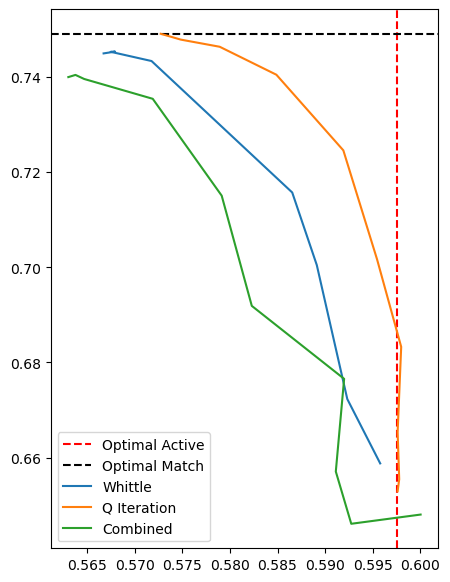

In [39]:
fig, ax = plt.subplots(figsize=(5,7))

ax.axvline(x=optimal_active_rate, color='red', linestyle='--',label='Optimal Active')

# Plot the horizontal dashed line
ax.axhline(y=np.mean(optimal_match_reward), color='black', linestyle='--',label='Optimal Match')

plt.plot(approximate_active,approximate_match,label='Whittle')
plt.plot(joint_active,joint_match,label='Q Iteration')
plt.plot(sufficient_active,sufficient_match,label='Combined')
plt.legend() 

In [ ]:
data = {
    'mean_reward': rewards_by_lamb, 
    'std_reward': std_by_lamb,
    'active_rate': active_rates_by_lamb, 
    'parameters': 
        {'seed'      : seed,
        'n_arms'    : n_arms,
        'budget'    : budget,
        'discount'  : discount, 
        'alpha'     : alpha, 
        'n_episodes': n_episodes, 
        'episode_len': episode_len, 
        'n_epochs'  : n_epochs, 
        'match_prob': match_prob} 
}

In [ ]:
save_path = get_save_path('matching',save_name,seed,use_date=save_with_date)

In [ ]:
delete_duplicate_results('matching',save_name,data)

In [ ]:
json.dump(data,open('../results/'+save_path,'w'))